#HOUSE PRICE PREDICTION

In this project, I've made a Machine Learning Model that predicts the price of a house, based on the information and characteristics of the house. I've used supervised ML technique Regression from XGBoost (Extreme Gradient Boosting) for that purpose. The "XGBRegressor" is a specific implementation of XGBoost for regression tasks. It's designed to predict continuous numeric values. XGBRegressor is known for its efficiency, flexibility, and ability to handle various types of datasets.

In [8]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import sklearn.datasets as datasets

For my project, I've used the California House dataset, which is available in the sklearn.datasets library. You can directly import the dataset into your program from the sklearn library.

In [9]:
dataset= datasets.fetch_california_housing()

In [10]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

As we see, the dataset is not in a structured form. So, we first convert it into a structured pandas dataframe.

In [11]:
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


 Target variable in the dataset is the median house value for California districts,expressed in hundreds of thousands of dollars ($100,000). We will include that into our dataframe as the price of the house.

In [12]:
df['Price']=dataset.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Let's check if there are some missing values available in our dataset.

In [13]:
#Check for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between the various features in the dataset

1. Positive correlation
2. Negative correlation

In [15]:
correlation= df.corr()

<Axes: >

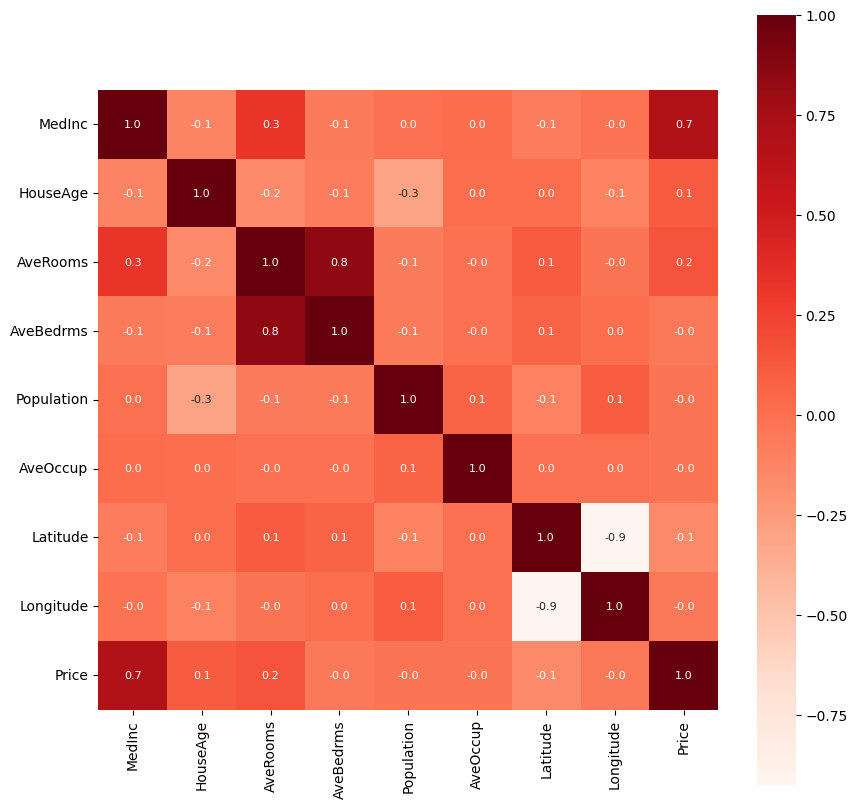

In [24]:
#Plotting the correlation data
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square= True, fmt='.1f', annot= True, annot_kws={'size':8}, cmap='Reds')

From the heatmap, we can see that there are several columns which does not affect the price of the house. So we drop such columns.

In [25]:
df.drop(columns=['AveBedrms', 'Population', 'AveOccup', 'Longitude'], axis=1, inplace=True)

In [27]:
correlation= df.corr()

<Axes: >

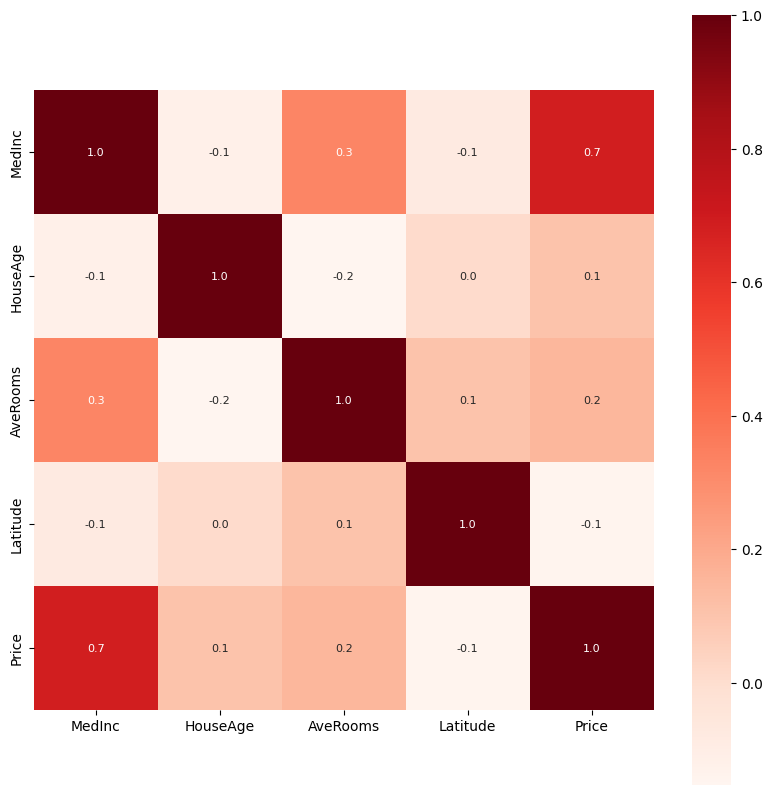

In [28]:
#Plotting the correlation data
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square= True, fmt='.1f', annot= True, annot_kws={'size':8}, cmap='Reds')

Now, we make 2 separate dataframes X and Y, where X will contain the properties that determines the price of the house, and Y will contain the price of the house.

In [29]:
X=df.drop(columns='Price', axis=1)
Y=df['Price']

In [30]:
X

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,41.0,6.984127,37.88
1,8.3014,21.0,6.238137,37.86
2,7.2574,52.0,8.288136,37.85
3,5.6431,52.0,5.817352,37.85
4,3.8462,52.0,6.281853,37.85
...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48
20636,2.5568,18.0,6.114035,39.49
20637,1.7000,17.0,5.205543,39.43
20638,1.8672,18.0,5.329513,39.43


In [31]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

Now, we can split the data into training and test data by using the train_test_split function present in the sklearn library.

In [32]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Model Training

In [33]:
#loading the model
model= XGBRegressor()

In [34]:
#training the model with x_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Model Evaluation

Now since our model is trained, we will now check the accuracy of our model, about how accurately can it predict.

Prediction on training data

In [36]:
training_data_prediction= model.predict(X_train)
print(training_data_prediction)

[2.5116568 1.6021518 1.3352258 ... 0.9430268 1.4202778 1.3071121]


In [37]:
#R squared error
score_1= metrics.r2_score(Y_train, training_data_prediction)

#Mean absolute error
score_2= metrics.mean_absolute_error(Y_train, training_data_prediction)

In [38]:
score_1

0.8113774646533722

In [39]:
score_2

0.35469623984589244

The values of the R Squared error and Mean absolute error are 0.81 and 0.35, which are very close to zero. This shows that our model is making very accurate predictions for training data.

Visualizing the actual prices and predicted prices for training data

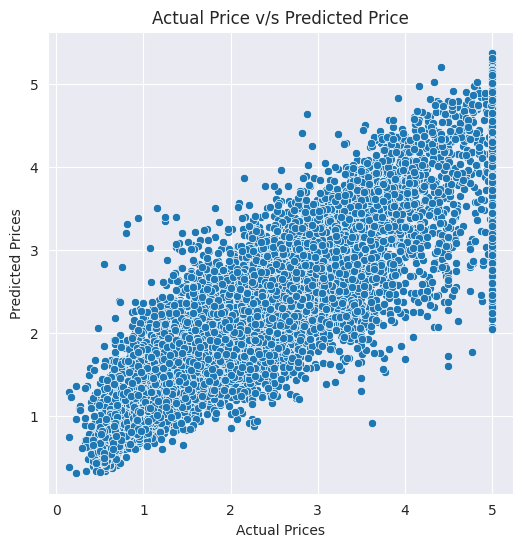

In [54]:
# plt.scatter(Y_train, training_data_prediction)
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.scatterplot(x=Y_train, y=training_data_prediction)
# sns.scatterplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v/s Predicted Price")
plt.show()

Prediction on test data

In [40]:
test_data_prediction= model.predict(X_test)
print(test_data_prediction)

[2.4861004 0.4438574 2.5300434 ... 2.7940414 2.9172895 1.5594356]


In [41]:
#R squared error
score_1= metrics.r2_score(Y_test, test_data_prediction)

#Mean absolute error
score_2= metrics.mean_absolute_error(Y_test, test_data_prediction)

In [42]:
score_1

0.6615502958920845

In [43]:
score_2

0.46644505960964155

The values of the R Squared error and Mean absolute error are 0.66 and 0.46, which are very close to zero. This shows that our model is making very accurate predictions for test data.

Visualizing the actual prices and predicted prices for test data

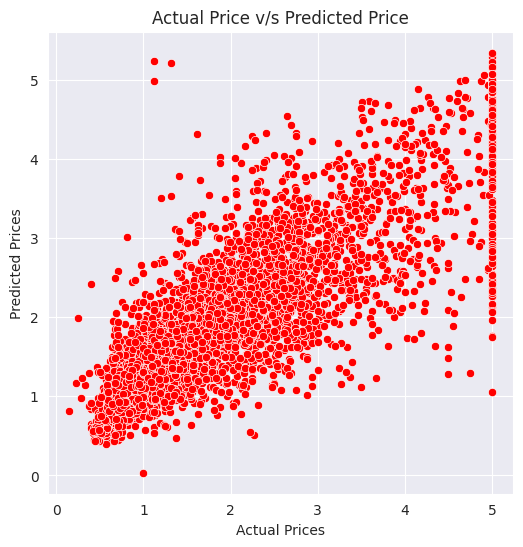

In [58]:
sns.scatterplot(x=Y_test, y=test_data_prediction, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v/s Predicted Price")
plt.show()

##CONCLUSION


In this project, I performed supervised machine learning technique, Regression from XGB Regressor for building a model that predicts the price of a house, based on the characteristics and properties of the house.

## References and Future Work

You can find the links to the resources that I found useful during the execution of this project and learn more about the tools and libraries used in it.


*   Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
*   Numpy user guide: https://numpy.org/doc/stable/user/absolute_beginners.html
*   XGBoost Regressor user guide: https://docs.getml.com/1.1.0/api/getml.predictors.XGBoostRegressor.html